In [115]:
import datetime 
import urllib, re, math
from matplotlib import pyplot as plt
import pandas as pd
import numpy as np
import scipy as sp
from sklearn.linear_model import LinearRegression
# change plot size
plt.rcParams['figure.dpi'] = 200
# change max number of rows to show
pd.set_option('display.max_rows', 300)

In [99]:
URL = "https://raw.githubusercontent.com/CSSEGISandData/COVID-19/master/csse_covid_19_data/csse_covid_19_time_series/"
#      "https://raw.githubusercontent.com/CSSEGISandData/COVID-19/master/csse_covid_19_data/csse_covid_19_time_series/time_series_19-covid-Confirmed.csv"

files = ["time_series_19-covid-Confirmed.csv","time_series_19-covid-Deaths.csv","time_series_19-covid-Recovered.csv"]
file = files[0]
link =URL+file

#read csv can read urls directly
df = pd.read_csv(link)
# set row indices, only have dates for columns ids
df =df.set_index(["Country/Region","Lat","Long","Province/State"])

dt = df.columns[-1]
print(dt)
if sum(df[dt].apply(math.isnan)):
    print("missing samples go back one day")
    data = df.drop(columns=dt)
else:
    data = df
#create a no china row, all china and all US
noChin = data.index.levels[0][data.index.levels[0]!="China"]
data.loc["NoChina",np.NaN,np.NaN,np.NaN]=data.loc[noChin].sum()    

# note this is an over-estimate
data.loc[("USAll",np.NaN,np.NaN,np.NaN)]=data.loc["US"].sum()    

data.loc[("ChinaAll",np.NaN,np.NaN,np.NaN)]=data.loc["China"].sum()    



3/11/20


In [51]:
# usa has a problem cities and states overlap
usStates="""
Alabama
Alaska
Arizona
Arkansas
California
Colorado
Connecticut
Delaware
Florida
Georgia
Hawaii
Idaho
Illinois
Indiana
Iowa
Kansas
Kentucky
Louisiana
Maine
Maryland
Massachusetts
Michigan
Minnesota
Mississippi
Missouri
Montana
Nebraska
Nevada
New Hampshire
New Jersey
New Mexico
New York
North Carolina
North Dakota
Ohio
Oklahoma
Oregon
Pennsylvania
Rhode Island
South Carolina
South Dakota
Tennessee
Texas
Utah
Vermont
Virginia
Washington
West Virginia
Wisconsin
Wyoming
"""

US = usStates.split('\n')[1:-1]
#data.loc[(US)]
sp.size(US)
#usStates.split('\n')[1:-1]
#US = list(set(data.index.levels[3])&set(US))
print(data.loc[("US",slice(None),slice(None),US)].sum()[-1])
print(data.loc["US"].sum()[-1])
#data.filter(like=',',axis=0)
#data.loc["US"]
#data.loc["US"]
#data.loc[("US",slice(None),slice(None), lambda df.: df.index.levels[3].str.contains(','))]


1204
2384


In [82]:


# create new groups
# dont use string for UR, but the 50 states
euro      = ["Germany","France","Italy","Sweden","Switzerland","Spain","Portugal","Belgium","Iceland","Ireland"]
northAmer = ["US","Canada","Mexico"],
asia      = ["South Korea","Taiwan","Japan"]   
middleEast=["Iraq","Egypt","Iran"]
countries={ "No China":"NoChina",
            "North America":northAmer,
            "Euro":euro,            
            "middle east":middleEast,
            "China":"China",
            "Japan":"Japan",
            "Italy":"Italy",            
            "South Korea":"Korea, South",
            "US":"US"}


AttributeError: 'Index' object has no attribute 'levels'

In [61]:

#data.loc["Italy"][dt]
data[dt]# get last row
data[data[dt]>1000]

1/22/20  1/23/20  1/24/20  \
Country/Region Lat     Long      Province/State                              
Germany        51.0000  9.0000   NaN                   0        0        0   
Italy          43.0000  12.0000  NaN                   0        0        0   
Spain          40.0000 -4.0000   NaN                   0        0        0   
China          30.9756  112.2707 Hubei               444      444      549   
Iran           32.0000  53.0000  NaN                   0        0        0   
Korea, South   36.0000  128.0000 NaN                   1        1        2   
France         46.2276  2.2137   France                0        0        2   
China          23.3417  113.4244 Guangdong            26       32       53   
               33.8820  113.6140 Henan                 5        5        9   
               29.1832  120.0934 Zhejiang             10       27       43   
               27.6104  111.7088 Hunan                 4        9       24   

                                                 1/25/20  1/26/20  1/27/20  \
Country/Region Lat     Long      Province/State                              
Germany        51.0000  9.0000   NaN                   0        0        1   
Italy          43.0000  12.0000  NaN                   0        0        0   
Spain          40.0000 -4.0000   NaN                   0        0        0   
China          30.9756  112.2707 Hubei               761     1058     1423   
Iran           32.0000  53.0000  NaN                   0        0        0   
Korea, South   36.0000  128.0000 NaN                   2        3        4   
France         46.2276  2.2137   France                3        3        3   
China          23.3417  113.4244 Guangdong            78      111      151   
               33.8820  113.6140 Henan                32       83      128   
               29.1832  120.0934 Zhejiang             62      104      128   
               27.6104  111.7088 Hunan                43       69      100   

                                                 1/28/20  1/29/20  1/30/20  \
Country/Region Lat     Long      Province/State                              
Germany        51.0000  9.0000   NaN                   4        4        4   
Italy          43.0000  12.0000  NaN                   0        0        0   
Spain          40.0000 -4.0000   NaN                   0        0        0   
China          30.9756  112.2707 Hubei              3554     3554     4903   
Iran           32.0000  53.0000  NaN                   0        0        0   
Korea, South   36.0000  128.0000 NaN                   4        4        4   
France         46.2276  2.2137   France                4        5        5   
China          23.3417  113.4244 Guangdong           207      277      354   
               33.8820  113.6140 Henan               168      206      278   
               29.1832  120.0934 Zhejiang            173      296      428   
               27.6104  111.7088 Hunan               143      221      277   

                                                 1/31/20   ...     3/2/20  \
Country/Region Lat     Long      Province/State            ...              
Germany        51.0000  9.0000   NaN                   5   ...        159   
Italy          43.0000  12.0000  NaN                   2   ...       2036   
Spain          40.0000 -4.0000   NaN                   0   ...        120   
China          30.9756  112.2707 Hubei              5806   ...      67103   
Iran           32.0000  53.0000  NaN                   0   ...       1501   
Korea, South   36.0000  128.0000 NaN                  11   ...       4335   
France         46.2276  2.2137   France                5   ...        191   
China          23.3417  113.4244 Guangdong           436   ...       1350   
               33.8820  113.6140 Henan               352   ...       1272   
               29.1832  120.0934 Zhejiang            538   ...       1206   
               27.6104  111.7088 Hunan               332   ...       1018   

  

4
0.058842927405781474
1.1450987152392023
4
-0.02812928697229496
0.937282941642722


<Figure size 432x288 with 0 Axes>

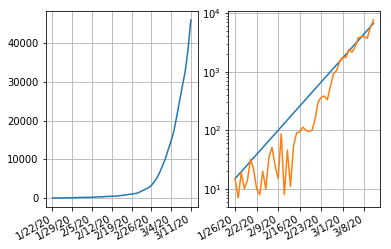

<Figure size 432x288 with 0 Axes>

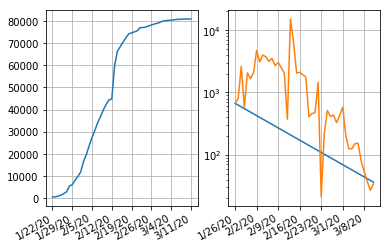

In [15]:
#assume (1+E*P) is 120%
import matplotlib.ticker as mticker

myLocator = mticker.MultipleLocator(7)

#determine slope and plot
for name in [noChin,"China"]:
    plt.figure()
    vals= data.loc[name].sum().diff()
    idx = np.argwhere(vals>0)[3][0]

    print(idx)
    vals = vals[idx:]
    lv = sp.log10(vals)
    m=(lv[-1]-lv[0])/(sp.size(lv))

    print(m)
    print(math.pow(10,m))
    
    fig, ax = plt.subplots(1,2)
    #---
    ax[1].plot(vals.index,pow(10,np.arange(0,sp.size(lv))*m+lv[0]))
    ax[1].semilogy(vals)
    
    ax[1].xaxis.set_major_locator(myLocator)
    ax[1].grid()
    fig.autofmt_xdate()
    
    #---
    ax[0].plot(data.loc[name].sum())        
    ax[0].xaxis.set_major_locator(myLocator)
    ax[0].grid()
    fig.autofmt_xdate()
    
#print(vals.index)
#print(sp.size(lv))

#plt.plot()
#sp.size(vals)
#regressor.fit(vals.index.vals.values)
#vals.index[1].apply(toordinal)
#a = pd.to_datetime(vals.index)
#Xs = pd.to_datetime(vals.index).strftime("%Y%m%d").astype(int)


# Create linear regression object
#from sklearn import datasets, linear_model
#regr = linear_model.LinearRegression()
#regr.fit([Xs],[vals])
#regr.coef_

No handles with labels found to put in legend.


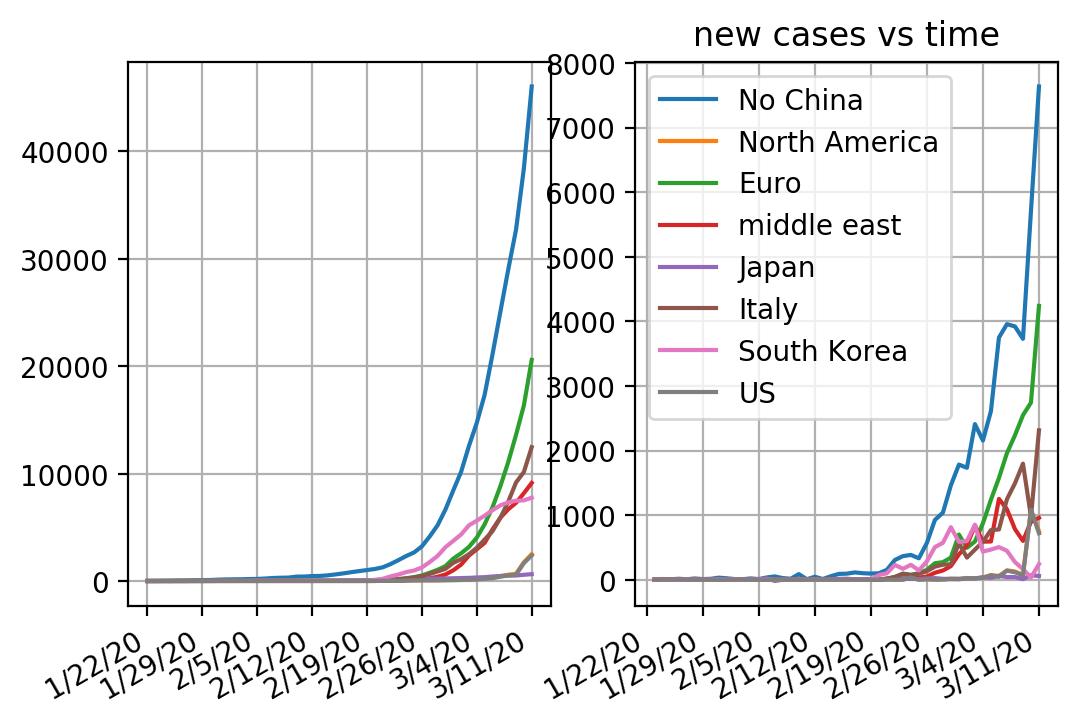

In [26]:
#ignore china here
fig, ax =plt.subplots(1,2)
for name in countries.keys():
    if name =="China":continue
    country = countries[name]
    ax[0].plot(data.loc[(country)].sum(),label=name)
ax[0].xaxis.set_major_locator(myLocator)
ax[0].grid()
plt.legend()
plt.title("total cases over time");


for name in countries.keys():
    if name =="China":continue
    country = countries[name]
    
    vals= data.loc[(country)].sum().diff()
    ax[1].plot(vals,label=name)
ax[1].xaxis.set_major_locator(myLocator)
ax[1].grid()
fig.autofmt_xdate()

plt.legend()
plt.title("new cases vs time");

In [ ]:
#raw data
data.loc["US"].sum()

# Smarter  model

Y' = A * sech^2( B * (t-C) )

Y = A/B * ( tanh( B * (t-C)) + 1 )

[ The equation for Y is just the integral of the equation for Y', where I have set the constant of integration to make the curve start at zero cases so far. ]


A = the peak infection rate (4600 case/day)

B = the width parameter (0.116)

C = the center date (2/6/2020 3AM)

sech z = 1/cosh z

       = 2/(e^z+e^-z)


 
# references

franklin antonio

https://royalsocietypublishing.org/doi/pdf/10.1098/rspa.1927.0118

 

The Epidemic Curve parts I & II, Wilson & Burke, 1942,1943

Proc Natl Acad Sci U S A. 1942 Sep; 28(9): 361–367

Proc Natl Acad Sci U S A. 1943 Jan; 29(1): 43–48

https://www.ncbi.nlm.nih.gov/pmc/articles/PMC1078491/pdf/pnas01644-0025.pdf

https://www.ncbi.nlm.nih.gov/pmc/articles/PMC1078553/pdf/pnas01648-0050.pdf


In [ ]:
(np.exp(0)+np.exp(0))/2.
np.cosh(1)
Nd
C

21
49


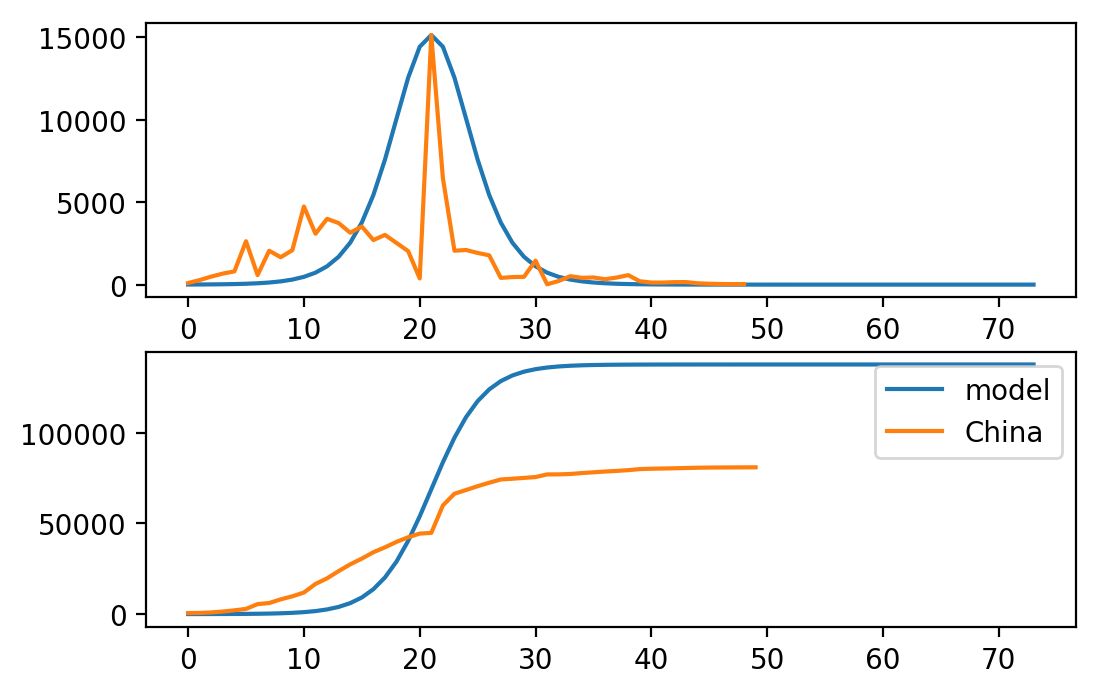

In [63]:

filtV= "South Korea"
filtV= "China"

#filtV = "Italy"
#filtV = "Euro"
for ctr in countries.keys():
    
    if not filtV == ctr: continue
    
        
    Nd = data.loc[countries[ctr]].sum().diff().values[1:]
    
    A=max(Nd)
    B=0.22

    C=np.argmax(Nd)

    # must be in days
    print(C)
    print(sp.size(Nd))
    t = np.arange(0,sp.size(Nd)+25)
    fig, ax = plt.subplots(2,1,)
    ax[0].plot(A/(np.cosh( B * (t-C))**2),label="model")
    ax[0].plot(Nd,label=ctr)
    ax[1].grid()
    ax[1].plot(A/B * ( np.tanh( B * (t-C)) + 1 ),label="model")
    ax[1].plot(data.loc[countries[ctr]].sum().values,label=ctr)
    ax[1].grid()
    plt.legend()
    #plt.title("total cases over time");


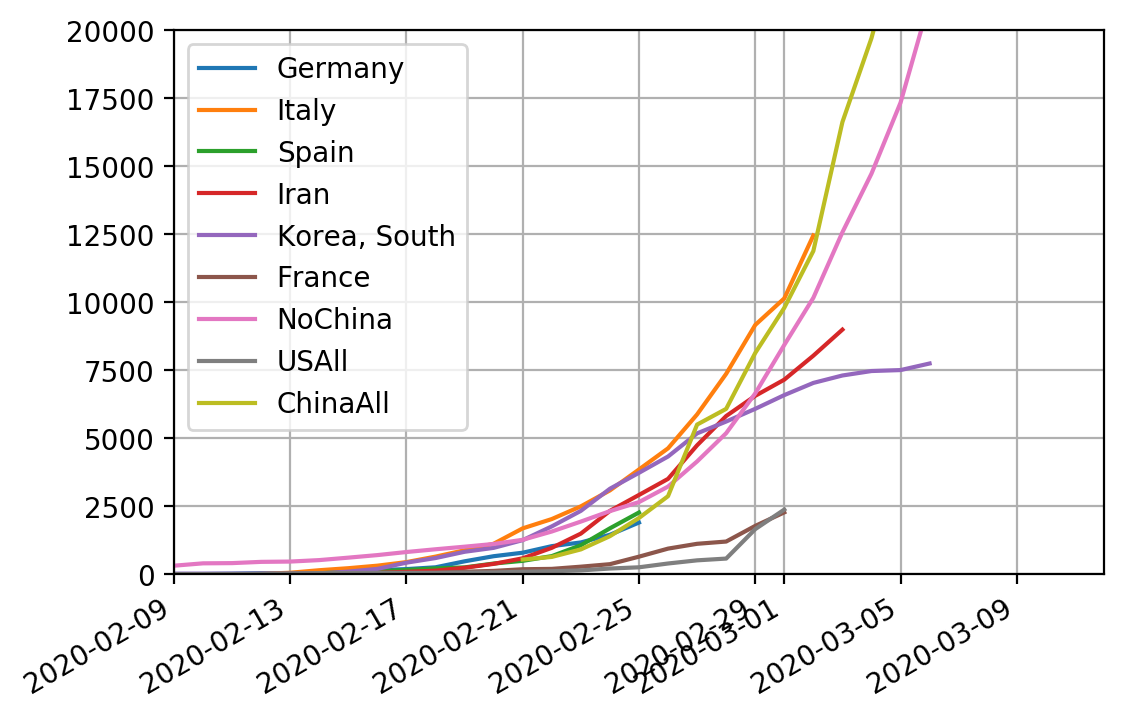

In [194]:
offsets = {"ChinaAll":30,
           "Italy":-9,
           "Spain":-15,
           "Iran":-8,
           "Germany":-15,
           "Korea, South":-5,
           "France":-10,
           "NoChina":0,
           "USAll":-10}
fig, ax=plt.subplots(1,1)
for index, row in data[data[dt]>1000].iterrows():
    ctr =index[0]
    #print(ctr)
    if("China" == ctr): continue
    #if np.isnan(index[3]):
    #    name = "%s%s"%(index[0],"")
#    else:
 #       name = "%s%s"%(index[0],index[3])
  #  print(name)
    #print(row.sum())
    
    vdt = [(datetime.datetime.strptime(d,"%m/%d/%y") +datetime.timedelta(days=offsets[ctr])).date()#.strftime("%m/%d")
           for d in data.columns]
    
    
    #print(vdt)
    #print(sp.size(vdt))
    #print(sp.size(row.values))
    ax.plot(vdt,row.values, label=ctr)
#ax.xaxis.set_major_locator(myLocator)
ax.grid()
ax.set_ylim(0, 20000)
#ax.set_xlim("2/4","3/10")
ax.set_xlim(datetime.date(2020, 2, 9), datetime.date.today())

fig.autofmt_xdate()

plt.legend()


In [186]:
datetime.date(2020, 2, 4)
datetime.date.today()

datetime.date(2020, 3, 12)